In [14]:
import pandas as pd
import datetime

start_time = datetime.datetime.now()
print("data load start")
dataKBS = pd.read_excel("../data/2022-11-22 13_48_42_7688_.xlsx", header=None) 
dataSBS = pd.read_excel("../data/2022-11-22 16_23_54_2354_.xlsx", header=None) 
dataMBC = pd.read_excel("../data/2022-11-23 09_33_10_2392_.xlsx", header=None) 
print("loaded")
print(datetime.datetime.now() - start_time)



data load start
loaded
0:00:00.265782


In [15]:
dataKBS.columns = ['title', 'url', 'body']
dataSBS.columns = ['title', 'url', 'body']
dataMBC.columns = ['title', 'url', 'body']

In [16]:
from konlpy.tag import Okt

In [17]:
okt = Okt()

In [18]:
dataKBS['token'] = dataKBS['body'].apply(lambda x : okt.nouns(str(x)))
dataSBS['token'] = dataSBS['body'].apply(lambda x : okt.nouns(str(x)))
dataMBC['token'] = dataMBC['body'].apply(lambda x : okt.nouns(str(x)))

In [19]:
TARGET = 'KBS'
w = 10
m = 5

start_time = datetime.datetime.now()
key_lst = dataKBS['token']

print('model build')
from gensim.models import Word2Vec
model_KBS = Word2Vec(sentences=key_lst, window=w, min_count=10, workers=8, sg=0)

from gensim.models import KeyedVectors
model_KBS.save(f'../result/w2v_model/{datetime.datetime.now().strftime("%m_%d_%H")}_w2v_w{w}m{m}_{TARGET}') # 모델 저장
print('model saved')
print(datetime.datetime.now() - start_time)


model build
model saved
0:00:00.588558


In [20]:
TARGET = 'SBS'
w = 10
m = 5

start_time = datetime.datetime.now()
key_lst = dataSBS['token']

print('model build')
from gensim.models import Word2Vec
model_SBS = Word2Vec(sentences=key_lst, window=w, min_count=10, workers=8, sg=0)

from gensim.models import KeyedVectors
model_SBS.save(f'../result/w2v_model/{datetime.datetime.now().strftime("%m_%d_%H")}_w2v_w{w}m{m}_{TARGET}') # 모델 저장
print('model saved')
print(datetime.datetime.now() - start_time)


model build
model saved
0:00:00.518222


In [21]:
TARGET = 'MBC'
w = 10
m = 5

start_time = datetime.datetime.now()
key_lst = dataSBS['token']

print('model build')
from gensim.models import Word2Vec
model_MBC = Word2Vec(sentences=key_lst, window=w, min_count=10, workers=8, sg=0)

from gensim.models import KeyedVectors
model_MBC.save(f'../result/w2v_model/{datetime.datetime.now().strftime("%m_%d_%H")}_w2v_w{w}m{m}_{TARGET}') # 모델 저장
print('model saved')
print(datetime.datetime.now() - start_time)


model build
model saved
0:00:00.493393


In [24]:
KBS = model_KBS.wv
SBS = model_SBS.wv
MBC = model_MBC.wv

In [47]:
import matplotlib.font_manager as fm
import matplotlib

font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf").get_name()

matplotlib.rcParams['font.family'] ='NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [64]:
import matplotlib.pyplot as plt

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8 ,6))
    plt.scatter(xs, ys, marker = 'o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

In [73]:
v = ['이태원', '윤석열', '대통령', '장관', '참사', '사고', '희생자', '압사', '분향소', '경찰', '소방', '행안부']

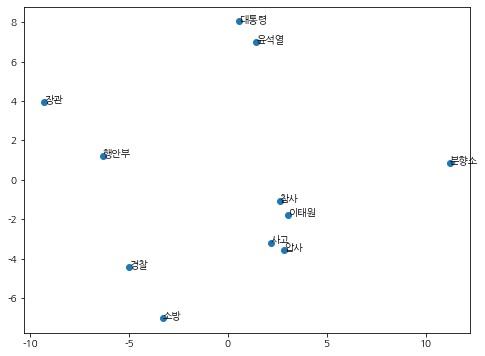

In [74]:
word = []
word_vector = []
for key in v:
    try:
        word_vector.append(KBS[key])
        word.append(key)
    except:
        pass
    
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector)
xs = xys[:,0]
ys = xys[:,1]

plot_2d_graph(word, xs, ys)

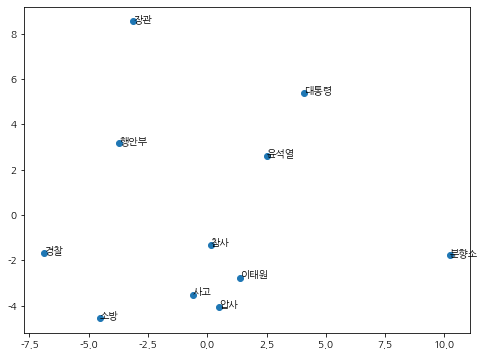

In [75]:
word = []
word_vector = []
for key in v:
    try:
        word_vector.append(SBS[key])
        word.append(key)
    except:
        pass
    
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector)
xs = xys[:,0]
ys = xys[:,1]

plot_2d_graph(word, xs, ys)

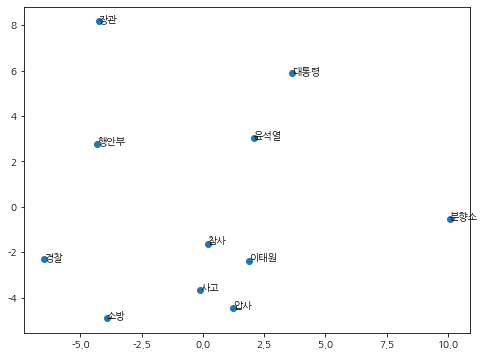

In [76]:
word = []
word_vector = []
for key in v:
    try:
        word_vector.append(MBC[key])
        word.append(key)
    except:
        pass
    
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector)
xs = xys[:,0]
ys = xys[:,1]

plot_2d_graph(word, xs, ys)